Dependencies will be tested between existing features and constructed features with the fraud tags

- constructed numerical feature: fraud proportion of the same card/ip address/email in the past
- constructed categorical boolean feature: anonymous (ip address, email address)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import sklearn as sci
%matplotlib inline
%load_ext autoreload
%autoreload

df = pd.read_csv('adyen-dataset.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [57]:
import datetime
def to_date(year, days_of_year, hour, minute):
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(days_of_year - 1)
    return datetime.datetime(year=date.year, month=date.month, day=date.day, hour=hour, minute=minute)
df['datetime'] = df.apply(lambda row: to_date(row['year'], row['day_of_year'], row['hour_of_day'], row['minute_of_hour']), axis=1)

In [58]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,...,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False,2021-07-25 13:51:00
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,...,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False,2021-12-11 15:20:00
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,...,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False,2021-10-20 01:56:00
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,...,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True,2021-08-30 12:50:00
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,...,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False,2021-11-14 19:26:00


In [59]:
df = df.sort_values(by="datetime")
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
47095,74588836273,Merchant B,MasterCard,2021,0,17,1,True,61.84,GR,...,iOS,NaN,-O3ZNM2PhNWiMwxhfnn3Ew,qO276RrcCHXnFdJYhsrKog,Ecommerce,DFFF,4526,True,False,2021-01-01 00:17:00
109111,84312413437,Merchant B,Other,2021,0,19,1,False,20.80,ZW,...,iOS,NaN,NaN,GReZubXFTrofD4bIfDwOEA,Ecommerce,DB,4526,False,False,2021-01-01 00:19:00
82841,15700686694,Merchant D,Other,2021,0,31,1,False,95.55,BR,...,Windows,f3ocVUgTPGxVrlhpOLYGaQ,w-YhoWIptK37VLEmfjXkUg,qarDDPsTDtdnKDFIX0lJ5A,POS,AAD,4891,False,False,2021-01-01 00:31:00
114570,76831611562,Merchant B,Visa,2021,0,42,1,True,17.83,NL,...,iOS,pCkS1NlcwmwqcTg06EU6Xg,K5-QrrBlpajXvDsYlMwiLw,W146roVdfL8V_d0W9J7jjA,Ecommerce,3941,4556,False,False,2021-01-01 00:42:00
131610,78860525616,Merchant D,Other,2021,0,42,1,True,16.38,NL,...,MacOS,NaN,j_Bl945hKPB8YvX0hbCQRA,_4qQSOFLt55qtiLpZnNbBA,Ecommerce,1104,4556,False,False,2021-01-01 00:42:00


In [107]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
df_card = df[df['card_number'] == "gLZvKVK0zdRzRlhufrrZjQ"]

<AxesSubplot:xlabel='datetime', ylabel='eur_amount'>

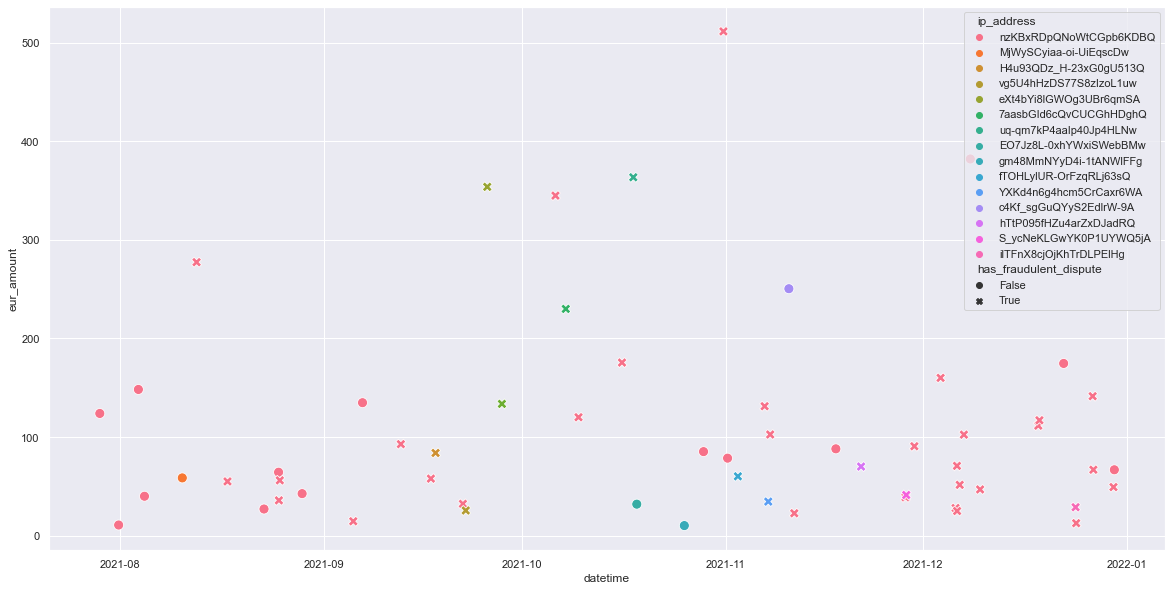

In [61]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="datetime", y="eur_amount",hue="ip_address",style="has_fraudulent_dispute",s=100,data=df_card)

IP Address -> Fraud

In [143]:
ip_df = df.groupby('ip_address').sum()
top_ip_df = ip_df[ip_df['has_fraudulent_dispute']>1]
top_ip_list = top_ip_df.index.values.tolist()
top_ip_df = df.query("ip_address == @top_ip_list")
top_ip_df

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime
71741,49784965852,Merchant C,Other,2021,1,47,1,True,100.38,NL,...,Other,OBUdjBcywMGZaYMxZpU9LA,8rFeA6dxeRdwLwqQWsl3cg,Cn_a2ZISA0bnoMxDk_vU_w,Ecommerce,2039,4645,True,False,2021-01-01 01:47:00
35479,61126367384,Merchant C,Other,2021,2,1,1,True,315.56,IT,...,Linux,dhNWkWOuOVeGtbTIgh0j2A,k6i0KUlt1maBGRY0Zs4TFQ,t859fFzVMiuJ9vTzQpShLg,Ecommerce,NaN,4571,True,False,2021-01-01 02:01:00
78581,13173499232,Merchant E,Visa,2021,2,3,1,False,17.32,GR,...,Android,9R4VCz-Gbyz1-h0Rj1ywOw,zw75Ce9YMASAARak28wtSA,4AVN7Q448S3Deey5nzOxwg,Ecommerce,FGDD,4622,False,False,2021-01-01 02:03:00
121279,26162509547,Merchant B,Visa,2021,4,6,1,True,109.48,IT,...,Windows,yrHXrfW79VP4X1jyc7-eGw,NaN,GvlEILP6lyz_nFf6bbDENg,Ecommerce,NaN,4920,False,True,2021-01-01 04:06:00
121418,74730462972,Merchant A,Other,2021,4,22,1,True,264.44,BR,...,Android,LXED3io1hDfngmuuQM4ebw,NaN,TGWCAKfCxiWwBHpfXkFLSw,Ecommerce,BZD,4645,True,False,2021-01-01 04:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,76983297254,Merchant C,Visa,2021,19,15,365,True,73.65,NL,...,Linux,omDhmyPUBOkQLkB7TwCCZw,UA1_4J6nXr9kqiD8VMcRaw,jIJuiconjzP9zWbCPSPq4g,Ecommerce,1104,4622,True,False,2021-12-31 19:15:00
72543,59157129522,Merchant B,Visa,2021,21,48,365,False,210.20,NL,...,MacOS,C6b4Q-to0B8M4lM6w1ddig,lYhr-SO0NR4WO-hYOI7htQ,nNt9TFpf37Oi66kIGTDskQ,Ecommerce,2039,4556,False,False,2021-12-31 21:48:00
85949,82383190464,Merchant C,Visa,2021,23,12,365,True,175.08,IT,...,Linux,Kq7foJiECBdOBAH6UFQLlA,gDEwcFYv7zaEsuyZgpBnOg,pc8_6-98hXoRkDQcKNnlEg,Ecommerce,NaN,4556,True,False,2021-12-31 23:12:00
4094,83431099967,Merchant D,Visa,2021,23,32,365,True,14.68,BR,...,Other,4ztbvluhp0eu-k5mf623fA,BxoxVcUabw9ENR0EBqtLlg,lyu-vyhstw-EHBcpRF9ZcA,Ecommerce,BZD,4133,True,False,2021-12-31 23:32:00


In [144]:
top_ip_df.groupby('ip_address').apply(lambda x: x.has_fraudulent_dispute.cumsum())

ip_address                    
--2E0toluie1TqMY-oXrQg  99784      1
                        3997       1
                        53107      1
                        68278      2
                        1437       3
                                  ..
zts5U45eQW0WfrybeY9Ugg  19300     20
                        54221     20
                        61636     21
                        25423     22
                        116648    23
Name: has_fraudulent_dispute, Length: 11728, dtype: int64

In [149]:
top_ip_df['cum_sum_fraud'] = (top_ip_df.groupby('ip_address')
                    .apply(lambda x: x.has_fraudulent_dispute.cumsum()).fillna(0)
                    .reset_index(0, drop=True))
top_ip_df['cum_count_transaction'] = top_ip_df.groupby('ip_address').cumcount()+1
top_ip_df['fraud_proportion'] = top_ip_df['cum_sum_fraud']/top_ip_df['cum_count_transaction']
top_ip_df

/var/folders/0r/z84cbr615yj03ct83zl_dq580000gn/T/ipykernel_51842/4067111343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ip_df['cum_sum_fraud'] = (top_ip_df.groupby('ip_address')
/var/folders/0r/z84cbr615yj03ct83zl_dq580000gn/T/ipykernel_51842/4067111343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ip_df['cum_count_transaction'] = top_ip_df.groupby('ip_address').cumcount()+1
/var/folders/0r/z84cbr615yj03ct83zl_dq580000gn/T/ipykernel_51842/4067111343.py:5: SettingWithCopyWarning: 
A val

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime,cum_sum_fraud,cum_count_transaction,fraud_proportion
71741,49784965852,Merchant C,Other,2021,1,47,1,True,100.38,NL,...,Cn_a2ZISA0bnoMxDk_vU_w,Ecommerce,2039,4645,True,False,2021-01-01 01:47:00,1,1,1.000000
35479,61126367384,Merchant C,Other,2021,2,1,1,True,315.56,IT,...,t859fFzVMiuJ9vTzQpShLg,Ecommerce,NaN,4571,True,False,2021-01-01 02:01:00,1,1,1.000000
78581,13173499232,Merchant E,Visa,2021,2,3,1,False,17.32,GR,...,4AVN7Q448S3Deey5nzOxwg,Ecommerce,FGDD,4622,False,False,2021-01-01 02:03:00,0,1,0.000000
121279,26162509547,Merchant B,Visa,2021,4,6,1,True,109.48,IT,...,GvlEILP6lyz_nFf6bbDENg,Ecommerce,NaN,4920,False,True,2021-01-01 04:06:00,0,1,0.000000
121418,74730462972,Merchant A,Other,2021,4,22,1,True,264.44,BR,...,TGWCAKfCxiWwBHpfXkFLSw,Ecommerce,BZD,4645,True,False,2021-01-01 04:22:00,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,76983297254,Merchant C,Visa,2021,19,15,365,True,73.65,NL,...,jIJuiconjzP9zWbCPSPq4g,Ecommerce,1104,4622,True,False,2021-12-31 19:15:00,14,29,0.482759
72543,59157129522,Merchant B,Visa,2021,21,48,365,False,210.20,NL,...,nNt9TFpf37Oi66kIGTDskQ,Ecommerce,2039,4556,False,False,2021-12-31 21:48:00,3,7,0.428571
85949,82383190464,Merchant C,Visa,2021,23,12,365,True,175.08,IT,...,pc8_6-98hXoRkDQcKNnlEg,Ecommerce,NaN,4556,True,False,2021-12-31 23:12:00,7,9,0.777778
4094,83431099967,Merchant D,Visa,2021,23,32,365,True,14.68,BR,...,lyu-vyhstw-EHBcpRF9ZcA,Ecommerce,BZD,4133,True,False,2021-12-31 23:32:00,8,18,0.444444


In [153]:
new_df = df[df['ip_address'].duplicated()][['ip_address','has_fraudulent_dispute']].groupby('ip_address').sum().sort_values(by="has_fraudulent_dispute",ascending=False)
top_n_ip_list = new_df[new_df['has_fraudulent_dispute'] >= 1].index.tolist()[:5]
top_n_ip_list

['nzKBxRDpQNoWtCGpb6KDBQ',
 '3Cwu5_lVTmRIisW87oZm1A',
 'yV7nl_JGU6rMLunl8kx8Og',
 'iP7XWoa8wOeObF3rF4LxyA',
 'yQouDhwd5Et2pE7dSSfghg']

In [154]:
top_n_ip_df = top_ip_df.query("ip_address == @top_n_ip_list")
top_n_ip_df

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,datetime,cum_sum_fraud,cum_count_transaction,fraud_proportion
5827,25288103519,Merchant A,MasterCard,2021,5,26,62,True,206.73,NL,...,tILz9SCTB-jZcC3KBe1tgA,Ecommerce,1104,4916,True,False,2021-03-03 05:26:00,1,1,1.000000
106130,74716600262,Merchant A,MasterCard,2021,2,2,63,True,306.48,IT,...,tILz9SCTB-jZcC3KBe1tgA,Ecommerce,NaN,4920,True,False,2021-03-04 02:02:00,2,2,1.000000
61143,88245379511,Merchant E,Visa,2021,8,28,63,True,79.49,BR,...,tILz9SCTB-jZcC3KBe1tgA,Ecommerce,XOL,4891,False,False,2021-03-04 08:28:00,2,3,0.666667
58793,18587783401,Merchant D,Other,2021,1,3,69,True,37.83,BR,...,tILz9SCTB-jZcC3KBe1tgA,Ecommerce,BZD,4622,True,False,2021-03-10 01:03:00,3,4,0.750000
80522,54203870980,Merchant A,MasterCard,2021,10,6,71,True,46.12,IT,...,Y2CRM7Pzj605-GoaMtAQ5A,Ecommerce,NaN,4802,False,False,2021-03-12 10:06:00,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,78504480876,Merchant B,Amex,2021,6,32,358,True,12.61,GR,...,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,XDED,4916,True,False,2021-12-24 06:32:00,30,45,0.666667
89471,57126406675,Merchant D,Visa,2021,18,45,360,True,141.41,BR,...,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,AAD,4622,True,False,2021-12-26 18:45:00,31,46,0.673913
3000,65357559682,Merchant D,Amex,2021,21,20,360,True,66.83,ZW,...,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,BB,4916,True,False,2021-12-26 21:20:00,32,47,0.680851
112789,44502494972,Merchant B,Visa,2021,22,43,363,True,49.20,BR,...,gLZvKVK0zdRzRlhufrrZjQ,Ecommerce,XOL,4526,True,False,2021-12-29 22:43:00,33,48,0.687500


<AxesSubplot:xlabel='datetime', ylabel='fraud_proportion'>

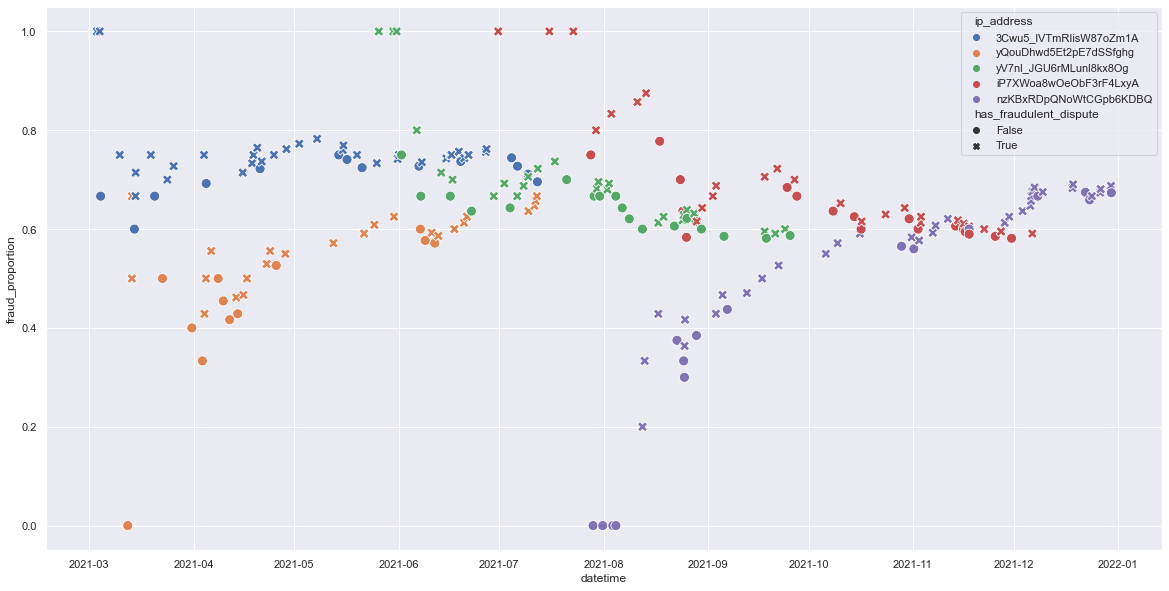

In [155]:
plt.figure(figsize=(20,10))
ip_list = []
top_ip_df
sns.scatterplot(x="datetime", y="fraud_proportion",hue="ip_address",style="has_fraudulent_dispute",s=100,data=top_n_ip_df)